In [93]:
import docplex.mp.model as md
import matplotlib.patches as pch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 带相序优化的多路径的长干道绿波协调控制模型

# 常量定义

<ul>
    <li>
        $\Delta r_{i,k}$ ：路径i在交叉口k获得的相位与标准相位之间的相位差
    </li><br>
    <li>
        $r_{i,k}$:路径i在交叉口k所获得相位的红灯时间
    </li><br>
    <li>
        $\epsilon$:极小正数
    </li><br>
    <li>
        $q_i$:路径$i$的交通流量
    </li><br>
    <li>
        $Q_k$:交叉口$k$的交通流量
    </li><br>
    <li>
        $d_k(\bar{d}_k)$:交叉口$k$与交叉口$k+1$之间的路段长度
    </li><br>
    <li>
        $f_k(\bar{f}_k)$:交叉口$k$处的上行（下行）方向的速度上限
    </li><br>
    <li>
        $e_k(\bar{e}_k)$:交叉口$k$处的上行（下行）方向的速度下限
    </li><br>
    <li>
        $h_k(\bar{h}_k)$:交叉口$k$处的上行（下行）方向的速度变化下限
    </li><br>
    <li>
        $g_k(\bar{g}_k)$:交叉口$k$处的上行（下行）方向的速度上限
    </li><br>
    </ul>

### 基础数据

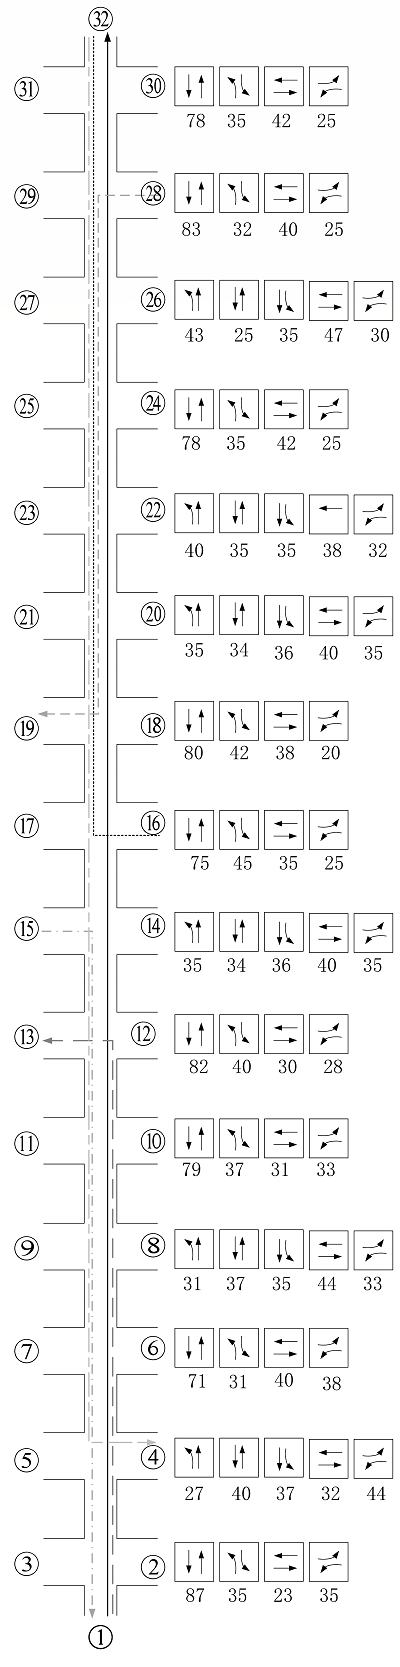

<ul>
    <li>
path 1 ：$1\to 32$  187 $~~~~$交叉口1至交叉口15直行</li><br>
    <li>
path 2 ：$1\to 13$  347 $~~~~$交叉口1至交叉口6左转</li><br>
            <li>
path 3 ：$16\to 32$  285 $~~~~$交叉口8（右转）至交叉口15直行</li><br>
    <li>
path 4 ：$32\to 4$  102 $~~~~$交叉口15至交叉口2左转</li><br>
        <li>
path 5 ：$28\to 19$  114 $~~~~$交叉口14（左转）至交叉口9左转</li><br>
        <li>
path 6 ：$15\to 1$  403 $~~~~$交叉口7（右转）至交叉口1直行</li><br>
    </ul>



In [94]:
q = np.array([187, 347, 285, 102, 114, 403])
Q = np.array(
    [
        [534, 534, 534, 534, 534, 187, 187, 472, 472, 472, 472, 472, 472, 472, 472],
        [403, 403, 505, 505, 505, 505, 102, 102, 102, 214, 214, 214, 214, 102, 102],
    ]
)

In [95]:
d = [236, 457, 346, 227, 226, 236, 200, 135, 117, 402, 404, 403, 354, 234, 287]

In [96]:
phase = np.array(
    [
        
        [23, 35, 0, 87, 0, 35],
        [32, 44, 27, 40, 37, 0],
        [40, 38, 0, 71, 0, 31],
        [44, 33, 31, 37, 35, 0],
        [31, 33, 0, 79, 0, 37],
        [30, 28, 0, 82, 0, 40],
        [40, 35, 35, 34, 36, 0],
        [35, 25, 0, 75, 0, 45],
        [38, 20, 0, 80, 0, 42],
        [40, 35, 35, 34, 36, 0],
        [38, 32, 40, 35, 35, 0],
        [42, 25, 0, 78, 0, 35],
        [47, 30, 43, 25, 35, 0],
        [40, 25, 0, 83, 0, 32],
        [42, 25, 0, 78, 0, 35],
    ]
)
phase = phase / 180

In [97]:
phase_get = np.array(
    [
        [
            [0, 0, 1, 1, 0, 0],
            [0, 0, 1, 1, 0, 0],
            [0, 0, 1, 1, 0, 0],
            [0, 0, 1, 1, 0, 0],
            [0, 0, 1, 1, 0, 0],
            [0, 0, 1, 1, 0, 0],
            [0, 0, 1, 1, 0, 0],
            [0, 0, 1, 1, 0, 0],
            [0, 0, 1, 1, 0, 0],
            [0, 0, 1, 1, 0, 0],
            [0, 0, 1, 1, 0, 0],
            [0, 0, 1, 1, 0, 0],
            [0, 0, 1, 1, 0, 0],
            [0, 0, 1, 1, 0, 0],
            [0, 0, 1, 1, 0, 0],
        ],
        [
            [0, 0, 1, 1, 0, 0],
            [0, 0, 1, 1, 0, 0],
            [0, 0, 1, 1, 0, 0],
            [0, 0, 1, 1, 0, 0],
            [0, 0, 1, 1, 0, 0],
            [0, 0, 0, 0, 0, 1],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
        ],
        [
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [1, 1, 1, 1, 1, 1],
            [0, 0, 1, 1, 0, 0],
            [0, 0, 1, 1, 0, 0],
            [0, 0, 1, 1, 0, 0],
            [0, 0, 1, 1, 0, 0],
            [0, 0, 1, 1, 0, 0],
            [0, 0, 1, 1, 0, 0],
            [0, 0, 1, 1, 0, 0],
        ],
        [
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1],
            [0, 0, 0, 1, 1, 0],
            [0, 0, 0, 1, 1, 0],
            [0, 0, 0, 1, 1, 0],
            [0, 0, 0, 1, 1, 1],
            [0, 0, 0, 1, 1, 0],
            [0, 0, 0, 1, 1, 0],
            [0, 0, 0, 1, 1, 0],
            [0, 0, 0, 1, 1, 0],
            [0, 0, 0, 1, 1, 0],
            [0, 0, 0, 1, 1, 0],
            [0, 0, 0, 1, 1, 0],
            [0, 0, 0, 1, 1, 0],
            [0, 0, 0, 1, 1, 0],
        ],
        [
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [1, 1, 1, 1, 1, 1],
            [0, 0, 0, 1, 1, 0],
            [0, 0, 0, 1, 1, 0],
            [0, 0, 0, 1, 1, 0],
            [0, 0, 0, 1, 1, 0],
            [0, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
        ],
        [
            [0, 0, 0, 1, 1, 0],
            [0, 0, 0, 1, 1, 0],
            [0, 0, 0, 1, 1, 0],
            [0, 0, 0, 1, 1, 0],
            [0, 0, 0, 1, 1, 0],
            [0, 0, 0, 1, 1, 0],
            [1, 1, 1, 1, 1, 1],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
        ],
    ]
)

In [98]:
rho = Q[0] / Q[1]
num = len(Q[0])
numr=len(q)
M = 1e6
nx = 0.00000001
speedScope=np.array([8,12])
speedVar=np.array([-2,2])
be = 8
ison = np.array([0, 0, 0, 1, 1, 1])


# 变量定义

In [99]:
model = md.Model("prosmodel")

<div class='alert alert-danger'>
$i\in \Omega_i$,  $\Omega_i$表示路径经过的交叉口集合
</div>

<ul>
    <li>
$b_{i,k}$:路径$i$在交叉口$k$获得的带宽</li><br>
    <li>
$w_{i,k}$:路径$i$在交叉口$k$的绿波带中心至绿灯相位左侧边缘（秒）
        </li><br>
    <li>
    $p_k$:二进制变量，用于表示交叉口是否为分割点；
    $$
    p_k=\left\{ \begin{array}{cl}
    1,& \text{如果交叉口$k$为干道分割点}\\
    0,& \text{其他}
   \end{array}\right.
    $$
    </li><br>
    <li>
        $\tau_{i,k}$:路径$i$在交叉口$k$的绿波带中心偏移量（秒）
        </li><br>
    <li>
        $\theta_k$:交叉口$k$的绝对相位差
        </li><br>
      <li>
        $t_{k}$:交叉口$k$与交叉口$k+1$之间的行程时间
        </li><br>
    <li>
        $n_{i,k}$:周期的整数倍
        </li><br>
        <li>
        $y_{i,k}$:路径i在交叉口是否能够取得有效带宽
        </li><br>
    </ul>
    

In [100]:
Z_list = [(i) for i in range(num)]
z = model.continuous_var_dict(Z_list, lb=1 / 200, ub=1 / 80, name="z")

p_list = [(i) for i in range(num)]
p = model.binary_var_dict(p_list, name="p")

o_list = [(i) for i in range(num)]
o = model.continuous_var_dict(o_list, lb=0, ub=1, name="o")

t_list = [(i, k) for i in range(2) for k in range(num-1)]
t = model.continuous_var_dict(t_list, lb=0, name="t")

w_list = [(i, k) for i in range(numr) for k in range(num)]
w = model.continuous_var_dict(w_list, lb=0, ub=1, name="w")


b_list = [(i, k) for i in range(numr) for k in range(num)]
b = model.continuous_var_dict(b_list, lb=0, ub=1, name="b")

n_list = [(i, k) for i in range(numr) for k in range(num)]
n = model.integer_var_dict(n_list, lb=0, ub=10, name="n")

u_list = [(i, k) for i in range(numr) for k in range(num)]
u = model.continuous_var_dict(u_list, lb=0, ub=1, name="u")

y_list = [(i, k) for i in range(numr) for k in range(num)]
y = model.binary_var_dict(y_list, name="y")

x_list = [(l, m, k) for l in range(numr) for m in range(numr) for k in range(num)]
x = model.binary_var_dict(x_list, name="x")

r_list = [(i, k) for i in range(numr) for k in range(num)]
r = model.continuous_var_dict(r_list, lb=0, ub=1, name="r")
rb_list = [(i, k) for i in range(numr) for k in range(num)]
rb = model.continuous_var_dict(rb_list, lb=0, ub=1, name="rb")

<h1>一、基于路径的MULTIBAND模型</h1><br>
<strong>基于路径的带宽优化</strong>：将路径作为优化对象，在同一模型里寻找每一条路径的绿波带宽

## 绿波带宽约束

保障路径$i$的绿波带宽出现出现在交叉口$k$内：

$$
\begin{cases}
b_{i,k}/2\leq w_{i,k}\leq 1-r_{i,k}-b_{i,k}/2\\
\bar{b}_{i,k}/2\leq \bar{w}_{i,k}\leq 1-r_{i,k}-\bar{b}_{i,k}/2
\end{cases}
$$

## 循环整形约束

保障路径$i$的带宽在交叉口$k$与$k+1$的绿波协调:
$$
\begin{cases}
\theta_k+r_{i,k}+\Delta r_{i,k}+w_{i,k}+t_{k}=\theta_{k+1}+r_{i,k+1}+\Delta r_{i,k+1}+w_{i,k+1}+n_{i,k+1}\\
\theta_k+\bar{r}_{i,k}+\Delta \bar{r}_{i,k}+\bar{w}_{i,k}+\bar{n}_{i,k}=\theta_{k+1}+\bar{r}_{i,k+1}+\Delta \bar{r}_{i,k+1}+\bar{w}_{i,k+1}+\bar{t}_{k}
\end{cases}
$$

## 行程时间约束

行程时间满足约束与multiband类似：
$$
\begin{cases}
\frac{d_k}{f_k}Z_k\leq t_k\leq \frac{d_k}{e_k}Z_k\\
\frac{\bar{d}_k}{\bar{f}_k}Z_k\leq \bar{t}_k\leq\frac{\bar{d}_k}{\bar{e}_k}Z_k
\end{cases}
$$

In [101]:
for k in range(num-1):
    model.add_constraint(d[k] /speedScope[1] * z[k] <= t[0, k])
    model.add_constraint(t[0, k] <= d[k]/ speedScope[0] * z[k])

    model.add_constraint(d[k] /speedScope[1] * z[k] <= t[1, k])
    model.add_constraint(t[1, k] <= d[k] /speedScope[0] * z[k])

相邻交叉口之间的路段的速度波动不应太大，其约束为:
$$
\begin{cases}
\frac{d_k}{h_k}Z\leq\frac{d_k}{d_{k+1}}t_{k+1}-t_{k}\leq\frac{d_k}{g_k}Z\\
\frac{\bar{d}_k}{\bar{h}_k}Z\leq\frac{\bar{d}_k}{\bar{d}_{k+1}}\bar{t}_{k+1}-\bar{t}_{k}\leq \frac{\bar{d}_i}{\bar{g}_i}Z
\end{cases}
$$

In [102]:
for k in range(num-2):
    model.add_constraint(d[k] /speedVar[0] * z[k] <= d[k] / d[k+1] * t[0, k+1] - t[0, k])
    model.add_constraint(d[k] / d[k+1] * t[0, k + 1] - t[0, k] <= d[k] / speedVar[1]* z[k])

    model.add_constraint(d[k] / speedVar[0] * z[k] <= d[k] / d[k+1] * t[1, k + 1] - t[1, k])
    model.add_constraint(d[k] / d[k] * t[1, k + 1] - t[1, k] <= d[k] / speedVar[1] * z[k])

# 二、相序优化模型

定义二进制变量$x_{l,m,k}$用于表达交叉口各相位的相序关系：
$$
x_{l,m,k}=\begin{cases}
1,&\text{如果交叉口$k$同一周期内的相位$l$在相位$m$之前}\\
0,& \text{其他}
\end{cases}
$$
为确保相序约束的有效性，定义如下约束：
$$
x_{l,l,k}=1\\
x_{l,m,k}+x_{m,l,k}=1\\
x_{l,n,k}\geq x_{l,m,k}+x_{m,n,k}-1
$$
下列约束保证两个相位连续且保持顺序：
$$
x_{n,l,k}+x_{m,n,k}=1 \quad \forall n\neq l\neq m\neq n
$$
下列约束保证三个相位连续且保持顺序：
$$
\left\{\begin{array}{cc}
x_{l,m,k}+x_{n,m,k}&=1\\
x_{u,l,k}+x_{m,u,k}&=1\\
x_{u,m,k}+x_{n,u,k}&=1
\end{array}\right.
\quad \forall u\neq l\neq m\neq n
$$

In [103]:
for k in range(num):
    model.add_constraints([x[l, l, k] == 1 for l in range(numr)])
    model.add_constraints([x[l, m, k] + x[m, l, k] == 1 for m in range(numr) for l in range(numr) if l != m])

    model.add_constraints([x[l, n, k] >= x[l, m, k] + x[m, n, k] - 1 for l in range(numr) for m in range(numr)
            for n in range(numr) if l != m and l != n and n != m ] )

    model.add_constraint(x[2, 3, k] + x[4, 3, k] == 1)
    model.add_constraints( [x[nk, 2, k] + x[3, nk, k] == 1 for nk in range(numr) if nk != 2 and nk != 3] )
    model.add_constraints( [x[nk, 3, k] + x[4, nk, k] == 1 for nk in range(numr) if nk != 3 and nk != 4] )

为表达交叉口各相序与路径之间的关系，定义二进制变量$\beta_{i,l,k}$:
$$
\beta_{i,l,k}=\begin{cases}
1,&\text{如果路径$i$在交叉口$k$的相位$l$能够取得通行权}\\
0,& \text{其他}
\end{cases}
$$
考虑到相序变化将导致绿灯时间的变化（一般保证路径$i$的绿灯时间连续）,则MULTIBAND相关约束可修改为：
$$\begin{cases}
b_{i,k}/2\leq w_{i,k}\leq\sum_{l}{\beta_{i,l,k}\phi_{l,k}}-b_{i,k}/2\\
\bar{b}_{i,k}/2\leq \bar{w}_{i,k}\leq \sum_{l}\beta_{i,l,k}\phi_{l,k}-\bar{b}_{i,k}/2
\end{cases}
$$

In [104]:
for i in range(numr):
    for k in range(num):
        model.add_constraint(b[i, k] / 2 <= w[i, k])
        model.add_constraint(w[i, k]<= model.sum([phase_get[i, k, l] * phase[k, l] for l in range(numr)])- b[i, k] / 2 )

各路径绿灯时间之后的红灯时长为：
$$

\begin{cases}
\sum_l\beta_{i,m,k}x_{l,m,k}\phi_{l,k}+M(1-\beta_{i,m,k}) &\geq r_{i,k}\\
\sum_l\beta_{i,m,k}x_{m,l,k}\phi_{l,k}+M(1-\beta_{i,m,k})&\geq \bar{r}_{i,k}\\
r_{i,k}+\bar{r}_{i,k}+\sum_l\beta_{i,l,k}\phi_{l,k}&=1
\end{cases}
$$

In [105]:
for i in range(numr):
    for k in range(num):
        model.add_constraints(
            [r[i, k]<= model.sum([phase_get[i, k, m]* x[l, m, k]* phase[k, l] for l in range(numr) if l != m ])
            + M * (1 - phase_get[i, k, m]) for m in range(numr) ])
        model.add_constraints(
            [rb[i, k]<= model.sum([ phase_get[i, k, m] * x[m, l, k] * phase[k, l] for l in range(numr) if l != m])
                + M * (1 - phase_get[i, k , m]) for m in range(numr) ])
        model.add_constraint(r[i, k]+ rb[i, k]+ model.sum([phase_get[i, k, l] * phase[k, l] for l in range(numr)])== 1)

<h1>三、考虑干道分割的MULTIBAND模型</h1>

引进二进制变量$p_k$,其定义如下：

$$
p_k=\begin{cases}
1,&\text{如果交叉口$k$为干道分割点}\\
0,& \text{其他}
\end{cases}
$$

为保证每个分段子区至少含有2个交叉口，可添加约束为：

$$p_k+p_{k+1}<=1$$

In [106]:
for k in range(num-1):
    model.add_constraint(p[k] + p[k + 1] <= 1)

引入相邻交叉口偏移量$\tau_{i,k}$，修改循环整形变量如下：

$$
\begin{cases}
\theta_k+r_{i,k}+w_{i,k}+t_{k}+\tau_{k+1}=\theta_{k+1}+r_{i,k+1}+w_{i,k+1}+n_{i,k+1}\\
\theta_k+\bar{r}_{i,k}+\bar{w}_{i,k}+\bar{n}_{i,k}=\theta_{k+1}+\Delta \bar{r}_{i,k+1}+\bar{w}_{i,k+1}+\bar{t}_{k}+\bar{\tau}_{k}
\end{cases}
$$

<div style="text-align: center;">
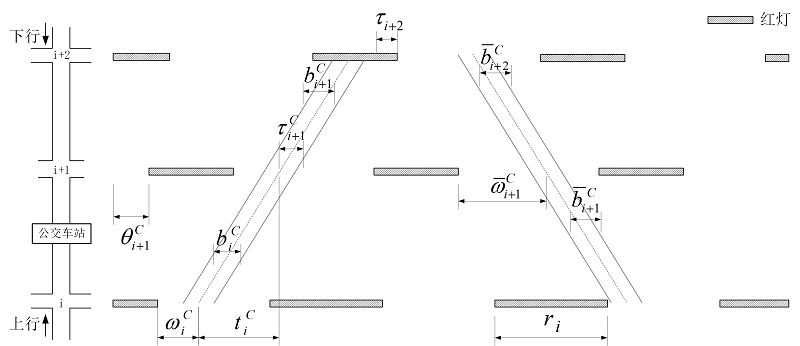
</div>

交叉口偏移量$\tau_{i,k}$，表示当交叉口$k$为干道分割点时，路径$i$在交叉口的偏移量，即当$p_k=1$时，$\tau_{i,k}>0$,否则，$\tau_{i,k}=0$,约束表达为：

$$
\epsilon p_k\leq \tau_{i,k}\leq p_k
$$

In [107]:
for k in range(num):
    for i in range(numr):
        model.add_constraints([nx * p[k] <= u[i, k], u[i, k] <= p[k]])

相同分段子区内部的交叉口绿波带宽相同，约束表达为：

$$\begin{cases}
-M p_{k+1}\leq b_{i,k}-b_{i,k+1}\leq M p_{k+1}\\
-M p_{k}\leq \bar{b}_{i,k}-\bar{b}_{i,k+1}\leq M p_{k}
\end{cases}
$$

In [108]:
for k in range(num-1):
    for i in range(0, 3):
        model.add_constraint(-M * p[k + 1] <= b[i, k] - b[i, k + 1])
        model.add_constraint(b[i, k] - b[i, k + 1] <= M * p[k + 1])
    for i in range(3,6):
        model.add_constraint(-M * p[k] <= b[i, k] - b[i, k + 1])
        model.add_constraint(b[i, k] - b[i, k + 1] <= M * p[k])

<h1>三、动态选择路径带宽，阻止无效带宽</h1>

传统的multiband带宽可能产生无效带宽，进而浪费交叉口通行资源，具体为：

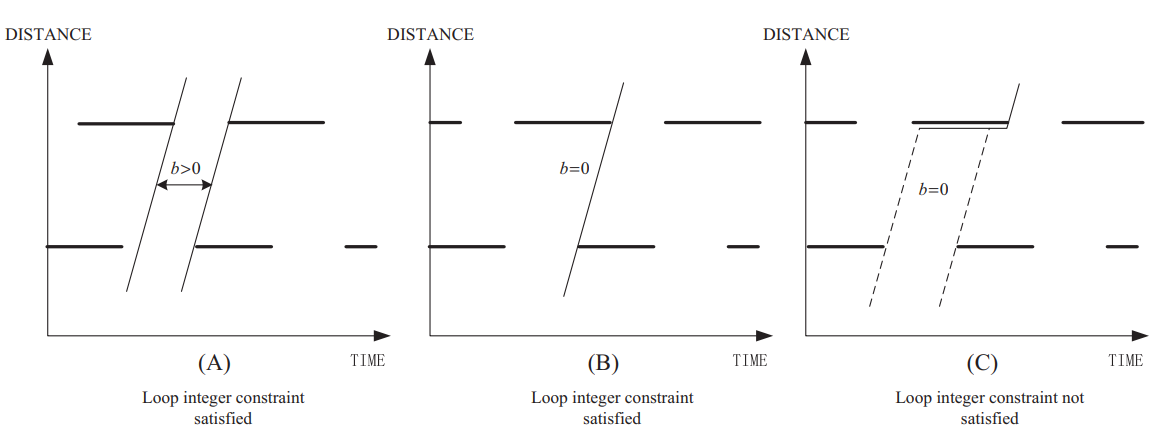

为避免路径产生无效带宽，引入二进制变量$y_{i,k}$,其定义如下：

$$
y_{i,k}=\begin{cases}
1,&\text{如果路径$i$在交叉口$k$能够获得有效非零带宽}\\
0,& \text{其他}
\end{cases}
$$

路径$i$在相同分组内取得相等带宽，进而约束相同分组内交叉口同时取得非零带宽，在不同分组可能无法取得带宽，其约束表达如下：


$$\begin{cases}
-M p_{k+1}\leq y_{i,k}-y_{i,k+1}\leq M p_{k+1}\\
-M p_{k}\leq \bar{y}_{i,k}-\bar{y}_{i,k+1}\leq M p_{k}
\end{cases}
$$


In [109]:
for k in range(num-1):
    for i in range(0, 3):
        model.add_constraint(-M * p[k + 1] <= y[i, k + 1] - y[i, k])
        model.add_constraint(y[i, k + 1] - y[i, k] <= M * p[k + 1])
    for i in range(3, 6):
        model.add_constraint(-M * p[k] <= y[i, k + 1] - y[i, k])
        model.add_constraint(y[i, k + 1] - y[i, k] <= M * p[k])

当路径$i$在交叉口$k$取得非零带宽，则应满足如下约束:

$$\begin{cases}
beZ_k-M (1-y_{i,k})\leq b_{i,k}\leq y_{i,k} \\
beZ_k-M (1-\bar{y}_{i,k})\leq \bar{b}_{i,k}\leq \bar{y}_{i,k}
\end{cases}
$$

其含义为，当路径$i$在交叉口$k$能够取得非零带宽,则其带宽应大于基础带宽$be$

In [110]:
for k in range(num):
    for i in range(numr):
        model.add_constraint(be * z[k] - M * (1 - y[i, k]) <= b[i, k])
        model.add_constraint(b[i, k] <= y[i, k])

因引入$y_{i,k}$，当路径$i$在交叉口$k$无法取得有效带宽时，其循环整形约束应不再起作用，循环整形约束可修改为:

$$
\begin{cases}
\theta_k+r_{i,k}+w_{i,k}+t_{k}+\tau_{k+1}\geq \theta_{k+1}+r_{i,k+1}+w_{i,k+1}+n_{i,k+1}-M(1-y_{i,k})\\
\theta_k+r_{i,k}+w_{i,k}+t_{k}+\tau_{k+1}\leq \theta_{k+1}+r_{i,k+1}+w_{i,k+1}+n_{i,k+1}+M(1-y_{i,k})\\ 
\end{cases}
$$

$$
\begin{cases}
\theta_k+\bar{r}_{i,k}+\bar{w}_{i,k}+\bar{n}_{i,k}\geq\theta_{k+1}+\bar{r}_{i,k+1}+\bar{w}_{i,k+1}+\bar{t}_{k}+\bar{\tau}_{k}-M(1-y_{i,k})\\
\theta_k+\bar{r}_{i,k}+\bar{w}_{i,k}+\bar{n}_{i,k}\leq\theta_{k+1}+\bar{r}_{i,k+1}+\bar{w}_{i,k+1}+\bar{t}_{k}+\bar{\tau}_{k}+M(1-y_{i,k})
\end{cases}
$$

In [111]:
model.add_constraint(o[0] == 0)
for k in range(num-1):
    for i in range(0, 3):
        model.add_constraint(o[k] + r[i, k] + w[i, k] + t[0, k] + u[i, k+1]>= 
        o[k + 1] + r[i, k + 1] + w[i, k + 1] + n[i, k + 1] - M * (1 - y[i, k+1]))
        model.add_constraint(o[k] + r[i, k] + w[i, k] + t[0, k] + u[i, k+1]<= 
        o[k + 1] + r[i, k + 1] + w[i, k + 1] + n[i, k + 1] + M * (1 - y[i, k+1]))
    for i in range(3, 6):
        model.add_constraint(o[k] + r[i, k] + w[i, k] + n[i, k]>= 
        o[k + 1]+ r[i, k + 1]+ w[i, k + 1]+ t[1, k]+ u[i, k]- M * (1 - y[i, k]))
        model.add_constraint(o[k] + r[i, k] + w[i, k] + n[i, k]<= 
        o[k + 1]+ r[i, k + 1]+ w[i, k + 1]+ t[1, k]+ u[i, k]+ M * (1 - y[i, k]))

注意到某些情况下，模型可能更偏好某一方向带宽，从而将其他方向的带宽设置为0，为避免这种情况的发生，同时体现模型对上行（下行）方向的偏好，定义约束：

$$
(1-\rho_{k})\sum_i b_{i,k}\geq (1-\rho_{k})\rho_{k} \sum_i \bar{b}_{i,k}
$$

该式能够根据交叉口$k$处上行与下行流量的大小，动态分配绿波带宽

In [112]:
for k in range(num):
    model.add_constraint((1 - rho[k]) * model.sum([b[i, k]*(1-ison[i]) for i in range(numr)])>=\
         (1 - rho[k])* rho[k]* model.sum([b[i, k]*ison[i] for i in range(numr)]))

<h1>四、协调周期自动协调</h1>

因干道分割可对长干道进行分组，组内实现干道协调，不同组之间互不影响，因此不同分组可采用不同的信号协调周期，其约束表达如下：

$$
\begin{cases}
Z_{min}\leq Z_k\leq Z_{max}\\
-Mp_{k+1}\leq Z_{k+1}-Z_{k}\leq MP_{k+1}
\end{cases}
$$

通过该约束，可实现在不同分段子区之间，可采用不同的信号周期，避免过长的干道采用相同信号周期造成部分交叉口车辆延误过大

In [113]:
for k in range(num-1):
    model.add_constraint(-M * p[k + 1] <= z[k + 1] - z[k])
    model.add_constraint(z[k + 1] - z[k] <= M * p[k + 1])

<h1>五、目标函数构建</h1>

$$
MAX:\sum_{i=1}^{I}\left(\omega_1\sum_{k=1}^{\Omega_i}\left(q_{i}b_{i,k}+\bar{q}_{i}\bar{b}_{i,k} \right)-\omega_2
\sum_{k=1}^{\Omega_i}\left(q_{i}\tau_{i,k}+\bar{q}_{i}\bar{\tau}_{i,k}\right)\right)-\omega_3\sum_{k=1}^{\Omega_i}\left(p_k\left(Q_k+\bar{Q}_k\right)\right)
$$

目标函数包括三部分：
<ul>
    <li>最大化每条路径各交叉口的的绿波带宽。</li><br>
    <li>最小化分割点停车等待时间。</li><br>
    <li>最小化分割次数，并限制分割点流量</li>

In [114]:
sum_b = model.sum([q[i] * b[i, k] for i in range(numr) for k in range(num)])
sum_u = model.sum([q[i] * u[i, k] for i in range(numr) for k in range(num)])
sum_p = model.sum([p[k] * (Q[0, k] + Q[1, k]) for k in range(num)])

In [115]:
model.maximize(sum_b * 5 - sum_u * 4 - sum_p * 1)

In [116]:
solution = model.solve()

In [117]:
solution.get_objective_value()

16539.793228040384

In [118]:
p = solution.get_value_dict(p)
o = solution.get_value_dict(o)
w = solution.get_value_dict(w)
n = solution.get_value_dict(n)
t = solution.get_value_dict(t)
u = solution.get_value_dict(u)
y = solution.get_value_dict(y)
z = solution.get_value_dict(z)
b = solution.get_value_dict(b)
r = solution.get_value_dict(r)

In [119]:
r

{(0, 0): 0.5166666666666666,
 (0, 1): 0.6277777777777778,
 (0, 2): 0.4333333333333334,
 (0, 3): 0.42777777777777776,
 (0, 4): 0.35555555555555557,
 (0, 5): 0.15555555555555553,
 (0, 6): 0.41666666666666663,
 (0, 7): 0.19444444444444448,
 (0, 8): 0.3222222222222222,
 (0, 9): 0.6166666666666667,
 (0, 10): 0.5833333333333335,
 (0, 11): 0,
 (0, 12): 0.6222222222222222,
 (0, 13): 0,
 (0, 14): 0,
 (1, 0): 0.5166666666666666,
 (1, 1): 0.6277777777777778,
 (1, 2): 0.4333333333333334,
 (1, 3): 0.42777777777777776,
 (1, 4): 0.35555555555555557,
 (1, 5): 0.6111111111111112,
 (1, 6): 0,
 (1, 7): 0,
 (1, 8): 0,
 (1, 9): 0,
 (1, 10): 0,
 (1, 11): 0,
 (1, 12): 0,
 (1, 13): 0,
 (1, 14): 0,
 (2, 0): 0,
 (2, 1): 0,
 (2, 2): 0,
 (2, 3): 0,
 (2, 4): 0,
 (2, 5): 0,
 (2, 6): 0.6083333333333334,
 (2, 7): 0,
 (2, 8): 0.32222222222222224,
 (2, 9): 0.6166666666666667,
 (2, 10): 0.5833333333333334,
 (2, 11): 0,
 (2, 12): 0.6222222222222222,
 (2, 13): -5.551115123125783e-17,
 (2, 14): 0,
 (3, 0): 0,
 (3, 1): 0.42

In [120]:
import pandas as pd

Df = pd.DataFrame(
    {
        "cross_number": range(1, num + 1),
        "distance": [d[i - 1] for i in range(num-1)] + [np.nan],
        "b1": [b[0, k] for k in range(num)],
        "b2": [b[1, k] for k in range(num)],
        "b3": [b[2, k] for k in range(num)],
        "b4": [b[3, k] for k in range(num)],
        "b5": [b[4, k] for k in range(num)],
        "b6": [b[5, k] for k in range(num)],
        "offset": [o[k] for k in range(num)],
        "p": [p[k] for k in range(num)],
        "t1": [t[0, k] for k in range(num-1)]+[np.nan],
        "t2": [t[1, k] for k in range(num-1)]+[np.nan],
        "y1": [y[0, k] for k in range(num)],
        "y2": [y[1, k] for k in range(num)],
        "y3": [y[2, k] for k in range(num)],
        "y4": [y[3, k] for k in range(num)],
        "y5": [y[4, k] for k in range(num)],
        "y6": [y[5, k] for k in range(num)],
        "z": [1 / z[k] for k in range(num)],
        "r1": [r[0, k] for k in range(num)],
        "r2": [r[1, k] for k in range(num)],
        "r3": [r[2, k] for k in range(num)],
        "r4": [r[3, k] for k in range(num)],
        "r5": [r[4, k] for k in range(num)],
        "r6": [r[5, k] for k in range(num)],
    }
)
Df["offset"] = Df.offset * Df.z
Df["t1"] = Df.t1 * Df.z
Df["t2"] = Df.t2 * Df.z
Df["b1"] = Df.b1 * Df.z
Df["b2"] = Df.b2 * Df.z
Df["b3"] = Df.b3 * Df.z
Df["b4"] = Df.b4 * Df.z
Df["b5"] = Df.b5 * Df.z
Df["b6"] = Df.b6 * Df.z
Df["r1"] = Df.r1 * Df.z
Df["r2"] = Df.r2 * Df.z
Df["r3"] = Df.r3 * Df.z
Df["r4"] = Df.r4 * Df.z
Df["r5"] = Df.r5 * Df.z
Df["r6"] = Df.r6 * Df.z
Df = Df.round(2)

In [121]:
Df

,cross_number,distance,b1,b2,b3,b4,b5,b6,offset,p,...,y4,y5,y6,z,r1,r2,r3,r4,r5,r6
0,1,287.0,16.70,96.67,0.00,0.00,0.00,85.56,0.00,0.0,...,0.0,0.0,1.0,200.00,103.33,103.33,0.00,0.00,0.00,103.33
1,2,236.0,31.90,35.58,0.00,0.00,0.00,50.92,0.73,1.0,...,0.0,0.0,1.0,119.04,74.73,74.73,0.00,50.26,0.00,50.26
2,3,457.0,31.90,35.58,0.00,46.96,0.00,46.96,64.62,0.0,...,1.0,0.0,1.0,119.04,51.59,51.59,0.00,51.59,0.00,51.59
3,4,346.0,31.90,35.58,0.00,46.96,0.00,46.96,0.87,0.0,...,1.0,0.0,1.0,119.04,50.92,50.92,0.00,71.43,0.00,71.43
4,5,227.0,31.90,35.58,0.00,46.96,0.00,46.96,11.72,0.0,...,1.0,0.0,1.0,119.04,42.33,42.33,0.00,42.33,0.00,42.33
5,6,226.0,31.35,0.00,0.00,32.26,0.00,32.26,0.00,1.0,...,1.0,0.0,1.0,81.78,12.72,49.98,0.00,12.72,0.00,12.72
6,7,236.0,31.35,0.00,0.00,17.10,0.00,0.00,8.15,0.0,...,1.0,0.0,0.0,81.78,34.08,0.00,49.75,49.98,0.00,0.00
7,8,200.0,30.67,0.00,30.67,16.73,0.00,0.00,39.38,1.0,...,1.0,0.0,0.0,80.00,15.56,0.00,0.00,15.56,0.00,0.00
8,9,135.0,30.67,0.00,30.67,26.67,26.67,0.00,48.70,0.0,...,1.0,1.0,0.0,80.00,25.78,0.00,25.78,25.78,0.00,0.00
9,10,117.0,30.67,0.00,30.67,26.67,26.67,0.00,35.84,0.0,...,1.0,1.0,0.0,80.00,49.33,0.00,49.33,33.33,33.33,0.00


In [122]:
Df[['b1','b2','b3','b4','b5','b6']].mean().mean()

23.238444444444443

In [123]:
x_list = np.array(
    [x[l, m, k] for l in range(numr) for m in range(numr) for k in range(num)], dtype=int
).reshape(6, 6, num)

In [124]:
x_list.shape

(6, 6, 15)

In [125]:
Df2 = Df.copy()
Df2["w1"] = [w[0, k] for k in range(num)]
Df2["w2"] = [w[1, k] for k in range(num)]
Df2["w3"] = [w[2, k] for k in range(num)]
Df2["w4"] = [w[3, k] for k in range(num)]
Df2["w5"] = [w[4, k] for k in range(num)]
Df2["w6"] = [w[5, k] for k in range(num)]
Df2["u1"] = np.array([u[0, k] for k in range(num)]) * Df.z
Df2["u2"] = np.array([u[1, k] for k in range(num)]) * Df.z
Df2["u3"] = np.array([u[2, k] for k in range(num)]) * Df.z
Df2["u4"] = np.array([u[3, k] for k in range(num)]) * Df.z
Df2["u5"] = np.array([u[4, k] for k in range(num)]) * Df.z
Df2["u6"] = np.array([u[5, k] for k in range(num)]) * Df.z
Df2["car_t1"] = Df2.offset + Df2.r1 + Df2.w1 * Df2.z - Df2.b1 / 2
Df2["car_t2"] = Df2.offset + Df2.r2 + Df2.w2 * Df2.z - Df2.b2 / 2
Df2["car_t3"] = Df2.offset + Df2.r3 + Df2.w3 * Df2.z - Df2.b3 / 2
Df2["car_t4"] = Df2.offset + Df2.r4 + Df2.w4 * Df2.z - Df2.b4 / 2
Df2["car_t5"] = Df2.offset + Df2.r5 + Df2.w5 * Df2.z - Df2.b5 / 2
Df2["car_t6"] = Df2.offset + Df2.r6 + Df2.w6 * Df2.z - Df2.b6 / 2

In [126]:
Df2.car_t1

0     146.400753
1      87.869226
2     131.264560
3      55.465371
4      74.395226
5      12.719500
6      42.229500
7      57.605000
8      74.478333
9      85.168333
10     55.429444
11      9.088333
12    128.901111
13      0.001111
14     19.500556
Name: car_t1, dtype: float64

# 六、可视化

In [127]:
def arrow(num, x, y, gw, hh=200, fac=8):
    arrow_num = []
    arrow1 = dict()
    arrow2 = dict()
    if num == 2:
        arrow1["text"] = ""
        arrow1["xy"] = (x + gw / 4 * 3, y + hh)
        arrow1["xytext"] = (0, -hh / 3 * 2)
        arrow1["textcoords"] = "offset pixels"
        arrow1["arrowprops"] = dict(
            arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=0"
        )
        arrow_num.append(arrow1)
        arrow2["text"] = ""
        arrow2["xy"] = (x, y + hh / 3 * 2)
        arrow2["xytext"] = (gw * 1.5, -hh / 3)
        arrow2["textcoords"] = "offset pixels"
        arrow2["arrowprops"] = dict(
            arrowstyle="->", connectionstyle="angle,angleA=90,angleB=0,rad=0"
        )
        arrow_num.append(arrow2)
    if num == 1:
        arrow1["text"] = ""
        arrow1["xy"] = (x + gw / 2 - fac, y + hh / 4 * 3)
        arrow1["xytext"] = (0, -hh / 4 * 2)
        arrow1["textcoords"] = "offset points"
        arrow1["arrowprops"] = dict(
            arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=0"
        )
        arrow_num.append(arrow1)
        arrow2["text"] = ""
        arrow2["xy"] = (x + gw / 2 + fac, y + hh / 4)
        arrow2["xytext"] = (0, hh / 4 * 2)
        arrow2["textcoords"] = "offset pixels"
        arrow2["arrowprops"] = dict(
            arrowstyle="->", connectionstyle="angle,angleA=90,angleB=0,rad=0"
        )
        arrow_num.append(arrow2)
    if num == 3:
        arrow1["text"] = ""
        arrow1["xy"] = (x + gw / 4, y + hh / 4)
        arrow1["xytext"] = (0, hh / 4 * 2)
        arrow1["textcoords"] = "offset pixels"
        arrow1["arrowprops"] = dict(
            arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=0"
        )
        arrow_num.append(arrow1)
        arrow2["text"] = ""
        arrow2["xy"] = (x + gw, y + hh / 4 * 2)
        arrow2["xytext"] = (-gw, hh / 4)
        arrow2["textcoords"] = "offset pixels"
        arrow2["arrowprops"] = dict(
            arrowstyle="->", connectionstyle="angle,angleA=90,angleB=0,rad=0"
        )
        arrow_num.append(arrow2)
    if num == 5:
        arrow1["text"] = ""
        arrow1["xy"] = (x, y + hh / 4 * 2)
        arrow1["xytext"] = (gw * 2, 0)
        arrow1["textcoords"] = "offset pixels"
        arrow1["arrowprops"] = dict(
            arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=0"
        )
        arrow_num.append(arrow1)
        arrow2["text"] = ""
        arrow2["xy"] = (x + gw, y + hh / 4)
        arrow2["xytext"] = (-gw * 2, 0)
        arrow2["textcoords"] = "offset pixels"
        arrow2["arrowprops"] = dict(
            arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=0"
        )
        arrow_num.append(arrow2)
    if num == 6:
        arrow1["text"] = ""
        arrow1["xy"] = (x + gw / 3, y + hh / 3 * 2)
        arrow1["xytext"] = (gw * 1.2, -hh / 3)
        arrow1["textcoords"] = "offset pixels"
        arrow1["arrowprops"] = dict(
            arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=0"
        )
        arrow_num.append(arrow1)
        arrow2["text"] = ""
        arrow2["xy"] = (x + gw / 4 * 3, y + hh / 3)
        arrow2["xytext"] = (-gw * 1.2, hh / 3)
        arrow2["textcoords"] = "offset pixels"
        arrow2["arrowprops"] = dict(
            arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=0"
        )
        arrow_num.append(arrow2)
    if num == 4:
        arrow1["text"] = ""
        arrow1["xy"] = (x + gw, y + hh / 4)
        arrow1["xytext"] = (-gw * 1.5, hh / 5)
        arrow1["textcoords"] = "offset pixels"
        arrow1["arrowprops"] = dict(
            arrowstyle="->", connectionstyle="angle,angleA=90,angleB=0,rad=0"
        )
        arrow_num.append(arrow1)
        arrow2["text"] = ""
        arrow2["xy"] = (x, y + hh / 4 * 2)
        arrow2["xytext"] = (gw * 1.5, -hh / 5)
        arrow2["textcoords"] = "offset pixels"
        arrow2["arrowprops"] = dict(
            arrowstyle="->", connectionstyle="angle,angleA=90,angleB=0,rad=0"
        )
        arrow_num.append(arrow2)
    return arrow_num

In [128]:
Df

,cross_number,distance,b1,b2,b3,b4,b5,b6,offset,p,...,y4,y5,y6,z,r1,r2,r3,r4,r5,r6
0,1,287.0,16.70,96.67,0.00,0.00,0.00,85.56,0.00,0.0,...,0.0,0.0,1.0,200.00,103.33,103.33,0.00,0.00,0.00,103.33
1,2,236.0,31.90,35.58,0.00,0.00,0.00,50.92,0.73,1.0,...,0.0,0.0,1.0,119.04,74.73,74.73,0.00,50.26,0.00,50.26
2,3,457.0,31.90,35.58,0.00,46.96,0.00,46.96,64.62,0.0,...,1.0,0.0,1.0,119.04,51.59,51.59,0.00,51.59,0.00,51.59
3,4,346.0,31.90,35.58,0.00,46.96,0.00,46.96,0.87,0.0,...,1.0,0.0,1.0,119.04,50.92,50.92,0.00,71.43,0.00,71.43
4,5,227.0,31.90,35.58,0.00,46.96,0.00,46.96,11.72,0.0,...,1.0,0.0,1.0,119.04,42.33,42.33,0.00,42.33,0.00,42.33
5,6,226.0,31.35,0.00,0.00,32.26,0.00,32.26,0.00,1.0,...,1.0,0.0,1.0,81.78,12.72,49.98,0.00,12.72,0.00,12.72
6,7,236.0,31.35,0.00,0.00,17.10,0.00,0.00,8.15,0.0,...,1.0,0.0,0.0,81.78,34.08,0.00,49.75,49.98,0.00,0.00
7,8,200.0,30.67,0.00,30.67,16.73,0.00,0.00,39.38,1.0,...,1.0,0.0,0.0,80.00,15.56,0.00,0.00,15.56,0.00,0.00
8,9,135.0,30.67,0.00,30.67,26.67,26.67,0.00,48.70,0.0,...,1.0,1.0,0.0,80.00,25.78,0.00,25.78,25.78,0.00,0.00
9,10,117.0,30.67,0.00,30.67,26.67,26.67,0.00,35.84,0.0,...,1.0,1.0,0.0,80.00,49.33,0.00,49.33,33.33,33.33,0.00


In [129]:
x_list[:, :, 0].sum(axis=0).argsort()

array([0, 1, 5, 4, 3, 2], dtype=int64)

In [130]:
x_list[:, :, 2]

array([[1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 1]])

In [131]:
phase = np.array([phase[i , :] * Df2.z[i ] for i in range(num)])

In [132]:
def data_formater(data, last_data, cross_num):
    while data < last_data:
        data += Df.z[cross_num]
    return data


def onbound(b, car_t, t, dis, distance):
    zip_x = [
        car_t,
        car_t + b,
        car_t + t + b,
        car_t + t,
    ]
    zip_y = [dis, dis, dis + distance, dis + distance]
    return zip_x, zip_y


def inbound(b, car_t, t, dis, distance):

    zip_x = [
        car_t + t,
        car_t + t + b,
        car_t + b,
        car_t,
    ]
    zip_y = [dis - distance, dis - distance, dis, dis]
    return zip_x, zip_y

[]

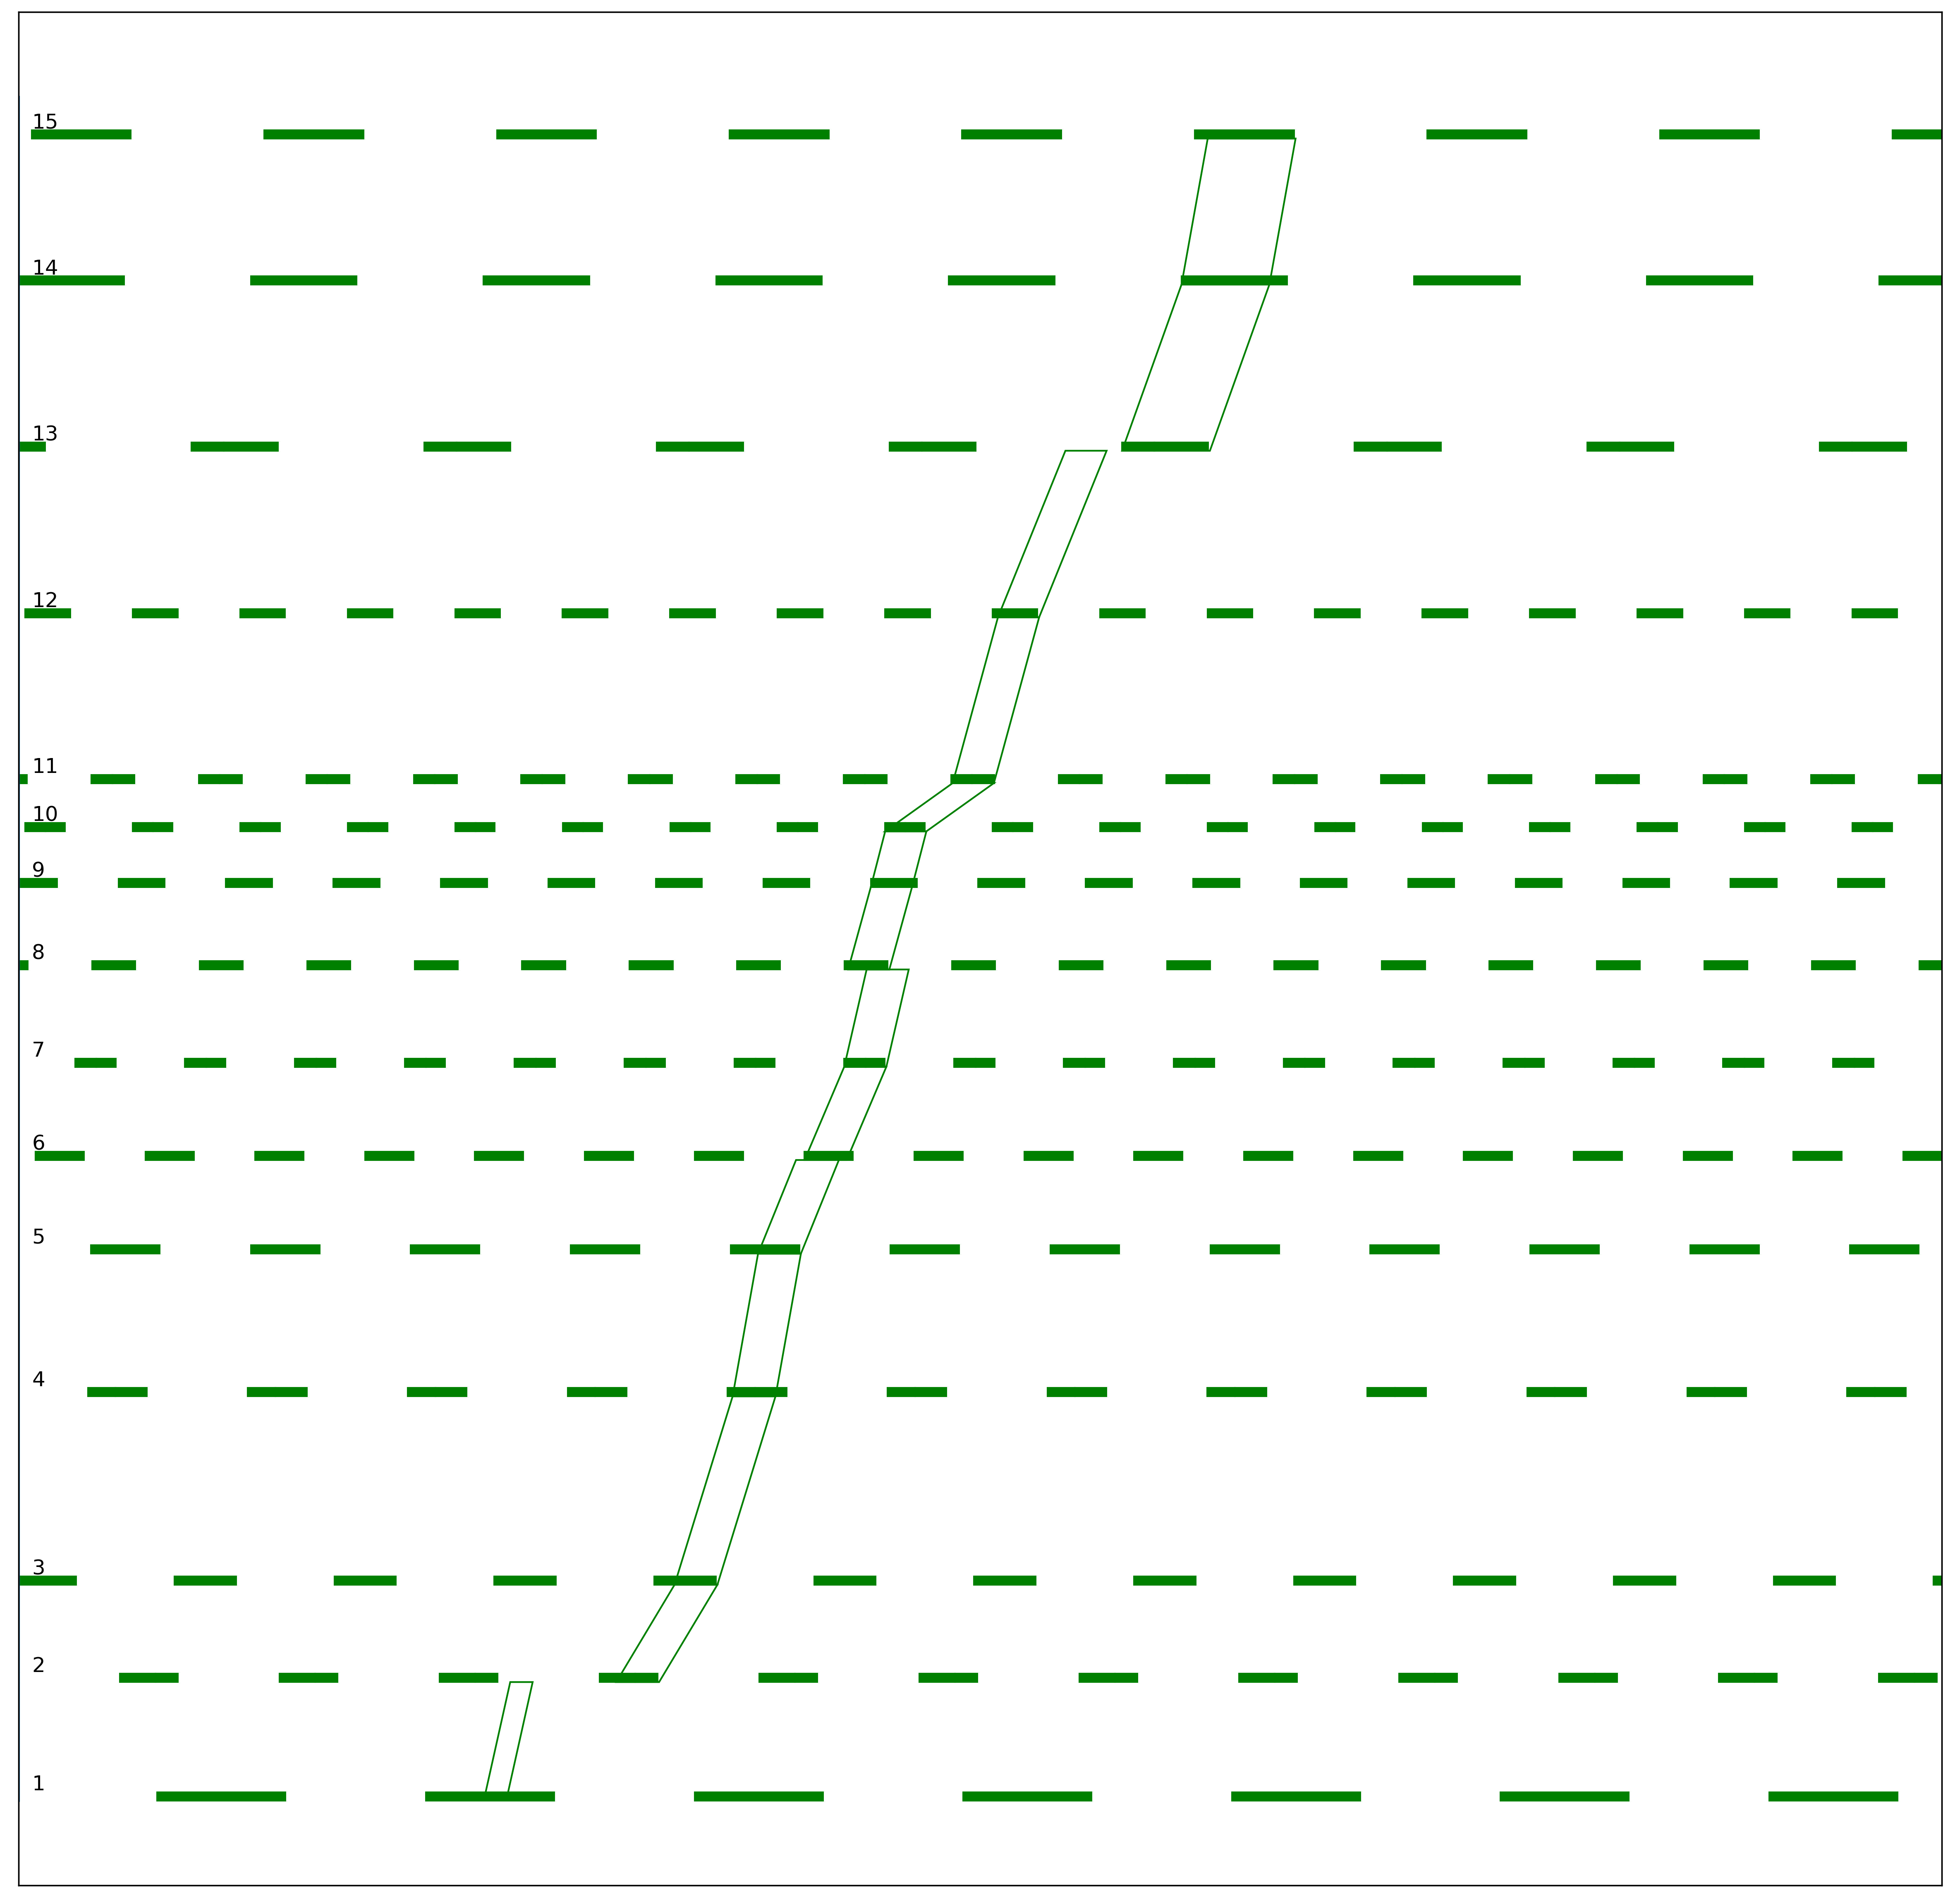

In [133]:
# color = ["red", "darkgray", "cyan", "g", "slateblue", "yellow"]
color = ["white", "white", "white", "white", "white", "white"]
fig1 = plt.figure(figsize=(20, 20), dpi=300)
ax1 = fig1.add_subplot()
legends = ["1->15", "1->6", "8->15", "15->2", "14->9", "7->1"]
legends_arrow = [r"$\rightleftarrows$"]
Df2.car_t1 += Df2.z
Df2.car_t2 += Df2.z * 2
Df2.car_t3 += Df2.z * 3
for i in range(1, num):
    Df2.loc[i, "car_t1"] = data_formater(Df2.car_t1[i], Df2.car_t1[i - 1], i)
    Df2.loc[i, "car_t2"] = data_formater(Df2.car_t2[i], Df2.car_t2[i - 1], i)
    Df2.loc[i, "car_t3"] = data_formater(Df2.car_t3[i], Df2.car_t3[i - 1], i)

Df2.car_t5 += Df2.z
Df2.car_t6 += Df2.z * 2
for i in range(num - 1, 0, -1):
    Df2.loc[i - 1, "car_t4"] = data_formater(Df2.car_t4[i - 1], Df2.car_t4[i], i - 1)
    Df2.loc[i - 1, "car_t5"] = data_formater(Df2.car_t5[i - 1], Df2.car_t5[i], i - 1)
    Df2.loc[i - 1, "car_t6"] = data_formater(Df2.car_t6[i - 1], Df2.car_t6[i], i - 1)

max_width = (max(Df2[["car_t1", "car_t2", "car_t3", "car_t4", "car_t5", "car_t6"]].max())+ Df2.z.max())
max_hight = sum(Df.distance[0 : num - 1]) + 100
legendc = dict()
for i in range(0, num):
    x_list_i = x_list[:, :, i].sum(axis=0)
    x_list_i_sort = x_list_i.argsort()
    offset_r = Df2.offset[i] - Df2.z[i]
    sum_dis = sum(Df2.distance[0:i])
    while offset_r < max_width:
        for j in x_list_i_sort:
            if phase[i, j] == 0:
                continue
            else:
                if phase_get[0,i,j]==1:
                    legendc["{}".format(j)] = ax1.add_patch(
                        plt.Rectangle(
                            (offset_r, sum_dis),
                            phase[i, j],
                            20,
                            color="green",
                        )
                    )
                else:
                    legendc["{}".format(j)] = ax1.add_patch(
                        plt.Rectangle(
                            (offset_r, sum_dis),
                            phase[i, j],
                            20,
                            color=color[j],
                        )
                    )
                offset_r += phase[i, j]
    ax1.text(10, sum(Df2.distance[0:i]) + 25, str(i + 1), fontsize=12)
# ax1.legend(
#     handles=[
#         legendc["0"],
#         legendc["1"],
#         legendc["2"],
#         legendc["3"],
#         legendc["4"],
#         legendc["5"],
#     ],
#     labels=["      ", "      ", "      ", "      ", "      ", "      "],
#     fontsize=12,
#     loc="center right",
# )
plt.plot([0, 0], [0, max_hight])

ax2 = ax1.twinx()
if Df2.car_t2[0] - Df2.car_t1[0] <= Df2.z[0] / 2:
    Df2.loc[0, "car_t2"] += Df2.z[0]

if Df2.car_t3[0] - Df2.car_t2[0] <= Df2.z[0] / 2:
    Df2.loc[0, "car_t3"] += Df2.z[0]


for i in range(0, num):
    dis = sum(Df2.distance[0:i])
    if Df2.b1[i] == 0:
        continue
    else:
        zip_x, zip_y = onbound(
            Df2.b1[i], Df2.car_t1[i], Df2.t1[i], dis, Df2.distance[i]
        )
        onbound1 = ax1.add_patch(pch.Polygon(xy=list(zip(zip_x, zip_y)), fill=False,color='g'))

# for i in range(0, num):
#     dis = sum(Df2.distance[0:i])
#     if Df2.b2[i] == 0:
#         continue
#     else:
#         zip_x, zip_y = onbound(
#             Df2.b2[i], Df2.car_t2[i], Df2.t1[i], dis, Df2.distance[i]
#         )
#         onbound2 = ax1.add_patch(
#             pch.Polygon(
#                 xy=list(zip(zip_x, zip_y)), fill=False,color='r'
#             )
#         )

# for i in range(0, num):
#     dis = sum(Df2.distance[0:i])
#     if Df2.b3[i] == 0:
#         continue
#     else:
#         zip_x, zip_y = onbound(
#             Df2.b3[i], Df2.car_t3[i], Df2.t1[i], dis, Df2.distance[i]
#         )
#         onbound3 = ax1.add_patch(
#             pch.Polygon(
#                 xy=list(zip(zip_x, zip_y)),
#                 fill=False,
#                 color='y'
#             )
#         )
# for i in range(1, num):
#     dis = sum(Df2.distance[0:i])
#     if Df2.b4[i] == 0:
#         continue
#     else:
#         zip_x, zip_y = inbound(
#             Df2.b4[i], Df2.car_t4[i], Df2.t2[i - 1], dis, Df2.distance[i - 1]
#         )
#         inbound1 = ax1.add_patch(
#             pch.Polygon(
#                 xy=list(zip(zip_x, zip_y)),
#                 fill=False,
#                 color='b'
#             )
#         )

# for i in range(1, num):
#     dis = sum(Df2.distance[0:i])
#     if Df2.b5[i] == 0:
#         continue
#     else:
#         zip_x, zip_y = inbound(
#             Df2.b5[i], Df2.car_t5[i], Df2.t2[i - 1], dis, Df2.distance[i - 1]
#         )
#         inbound2 = ax1.add_patch(
#             pch.Polygon(
#                 xy=list(zip(zip_x, zip_y)),
#                 fill=False,
#                 color='purple'
#             )
#         )

# for i in range(1, num):
#     dis = sum(Df2.distance[0:i])
#     if Df2.b6[i] == 0:
#         continue
#     else:
#         zip_x, zip_y = inbound(
#             Df2.b6[i], Df2.car_t6[i], Df2.t2[i - 1], dis, Df2.distance[i - 1]
#         )
#         inbound3 = ax1.add_patch(
#             pch.Polygon(
#                 xy=list(zip(zip_x, zip_y)),
#                 fill=False,
#             )
#         )
plt.xlim(
    [
        0,
        max_width,
    ]
)
plt.ylim(0, sum(Df.distance[0 : num - 1]) + 100)
ax2.set_xticks([])
ax2.set_yticks([])
ax1.set_xticks([])
ax1.set_yticks([])
# ax2.legend(
#     handles=[onbound1, onbound2, onbound3, inbound1, inbound2, inbound3],
#     labels=["path{}:".format(i) + legends[i - 1] for i in range(1, 7)],
#     fontsize=12,
#     loc="center right",
# )
# fig1.savefig(
#     r"./时距图", bbox_inches="tight"
# )

In [134]:
phase


array([[25.55555556, 38.88888889,  0.        , 96.66666667,  0.        ,
        38.88888889],
       [21.16266667, 29.09866667, 17.856     , 26.45333333, 24.46933333,
         0.        ],
       [26.45333333, 25.13066667,  0.        , 46.95466667,  0.        ,
        20.50133333],
       [29.09866667, 21.824     , 20.50133333, 24.46933333, 23.14666667,
         0.        ],
       [20.50133333, 21.824     ,  0.        , 52.24533333,  0.        ,
        24.46933333],
       [13.63      , 12.72133333,  0.        , 37.25533333,  0.        ,
        18.17333333],
       [18.17333333, 15.90166667, 15.90166667, 15.44733333, 16.356     ,
         0.        ],
       [15.55555556, 11.11111111,  0.        , 33.33333333,  0.        ,
        20.        ],
       [16.88888889,  8.88888889,  0.        , 35.55555556,  0.        ,
        18.66666667],
       [17.77777778, 15.55555556, 15.55555556, 15.11111111, 16.        ,
         0.        ],
       [16.88888889, 14.22222222, 17.77777778, 15.

In [135]:
Df2.offset

0      0.00
1      0.73
2     64.62
3      0.87
4     11.72
5      0.00
6      8.15
7     39.38
8     48.70
9     35.84
10     7.65
11     5.09
12    21.16
13     0.00
14     9.88
Name: offset, dtype: float64

In [136]:
Df2.r1

0     103.33
1      74.73
2      51.59
3      50.92
4      42.33
5      12.72
6      34.08
7      15.56
8      25.78
9      49.33
10     46.67
11      0.00
12    107.74
13      0.00
14      0.00
Name: r1, dtype: float64

In [137]:
x_list[:, :, 0]

array([[1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1]])

In [138]:
from IPython.display import HTML

HTML(
    """<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
 </form>"""
)